In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, InceptionResNetV2 , VGG19
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import splitfolders

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/yoga_pose"
#path = "/content/drive/SharedDrives/yoga_pose"


dataset = "yoga_pose"
path = "/content/drive/MyDrive/"+dataset
train_path = path + '/Train'
test_path = path + '/Test'
output = path + '/output'


In [ ]:
#Run only once to create the output folder
#splitfolders.ratio(train_path, output=output, seed=42, ratio=(.8, 0.2) )

shape of the image is: (268, 527, 4)


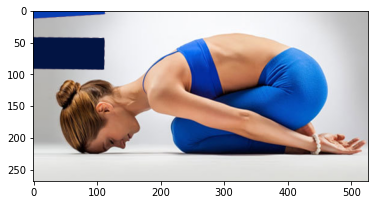

In [ ]:
# Visualise the original data
yoga_image = train_path + '/Balasana/' +  'File7.png'
print("shape of the image is:",imread(yoga_image).shape)
plt.imshow(imread(yoga_image))


In [ ]:
#split data to train and validate

#splitfolders.ratio(train_path, output="output", seed=42, ratio=(.8, 0.2) )

In [ ]:
train_data = ImageDataGenerator(width_shift_range = 0.1,horizontal_flip = True,rescale = 1./255)
val_data = ImageDataGenerator(width_shift_range = 0.1,horizontal_flip = True,rescale = 1./255)
test_data = ImageDataGenerator(rescale =1./255,validation_split = 0.2)

In [ ]:
splitted_dir =output
train_path = splitted_dir + '/train'
val_path = splitted_dir + '/val'

In [ ]:
batch_size = 16

In [ ]:
train_tot = train_data.flow_from_directory(directory = train_path,
                                                   target_size = (224,224),
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical',
                                                   batch_size = batch_size,
                                                   subset = 'training')
validation_tot = test_data.flow_from_directory(directory = val_path,
                                                       target_size = (224,224),
                                                       color_mode = 'rgb',
                                                       class_mode = 'categorical',
                                                      batch_size = batch_size,
                                                       subset = 'validation')
test_tot = test_data.flow_from_directory(directory = test_path,
                                                       target_size = (224,224),
                                                       color_mode = 'rgb',
                                                       class_mode = 'categorical',
                                                      batch_size = batch_size,
                                                       subset = 'validation')

Found 1172 images belonging to 29 classes.
Found 58 images belonging to 29 classes.
Found 137 images belonging to 29 classes.


In [ ]:
train_tot = train_data.flow_from_directory(directory = train_path,
                                                   target_size = (224,224),
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical',
                                                   batch_size = batch_size,
                                                   subset = 'training')
validation_tot = test_data.flow_from_directory(directory = val_path,
                                                       target_size = (224,224),
                                                       color_mode = 'rgb',
                                                       class_mode = 'categorical',
                                                      batch_size = batch_size,
                                                       subset = 'validation')
test_tot = test_data.flow_from_directory(directory = test_path,
                                                       target_size = (224,224),
                                                       color_mode = 'rgb',
                                                       class_mode = 'categorical',
                                                      batch_size = batch_size,
                                                       subset = 'validation')

In [ ]:
train_tot_448 = train_data.flow_from_directory(directory = train_path,
                                                   target_size = (448,448),
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical',
                                                   batch_size = batch_size,
                                                   subset = 'training')
validation_tot_448 = test_data.flow_from_directory(directory = val_path,
                                                       target_size = (448,448),
                                                       color_mode = 'rgb',
                                                       class_mode = 'categorical',
                                                      batch_size = batch_size,
                                                       subset = 'validation')
test_tot_448 = test_data.flow_from_directory(directory = test_path,
                                                       target_size = (448,448),
                                                       color_mode = 'rgb',
                                                       class_mode = 'categorical',
                                                      batch_size = batch_size,
                                                       subset = 'validation')

Found 1172 images belonging to 29 classes.
Found 58 images belonging to 29 classes.
Found 137 images belonging to 29 classes.


## VGG16

In [ ]:
#model_vgg16_0 : Replace classifier (1 Classifier)
#model_vgg16_1 : Replace classifier and train last 5 layers (1 Classifier)
#model_vgg16_2 : Add 5 layers and train last 5 layers (2 Dense , 2 Droput, 1 Classifier)
#model_vgg16_3 : Change Input size to 448*448 and Add 5 layers and train last 5 layers (2 Dense , 2 Droput, 1 Classifier)

In [ ]:
batch = 16
early_stopping = EarlyStopping(min_delta=0.005, patience=8, restore_best_weights=True)

**########  model_vgg16_0  ####################**

In [ ]:
x_1 = keras.applications.vgg16.VGG16(include_top=True, weights="imagenet",input_shape= (224,224,3))
x = x_1.layers[-2].output
predictions = Dense(29, activation='softmax')(x)
model_vgg16_0 = tf.keras.Model(inputs=x_1.input, outputs=predictions)
for layer in model_vgg16_0.layers:
  layer.trainable = False
model_vgg16_0.layers[-1].trainable = True
#print(model_vgg16_0.summary())
model_vgg16_0.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

553467096/553467096 [==============================] - 16s 0us/step


In [ ]:
history_0 = model_vgg16_0.fit(train_tot, validation_data = validation_tot, epochs = 30,callbacks = [early_stopping])

Epoch 1/30
39/74 [==============>...............] - ETA: 4:46 - loss: 3.9860 - accuracy: 0.0657

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


74/74 [==============================] - 675s 9s/step - loss: 3.7167 - accuracy: 0.1118 - val_loss: 2.9951 - val_accuracy: 0.1724
Epoch 2/30
74/74 [==============================] - 23s 305ms/step - loss: 2.7054 - accuracy: 0.2594 - val_loss: 2.4704 - val_accuracy: 0.3448
Epoch 3/30
74/74 [==============================] - 22s 300ms/step - loss: 2.3413 - accuracy: 0.3737 - val_loss: 2.4762 - val_accuracy: 0.3621
Epoch 4/30
74/74 [==============================] - 22s 303ms/step - loss: 2.0841 - accuracy: 0.4189 - val_loss: 1.8980 - val_accuracy: 0.3793
Epoch 5/30
74/74 [==============================] - 24s 320ms/step - loss: 1.9035 - accuracy: 0.4821 - val_loss: 1.8940 - val_accuracy: 0.4655
Epoch 6/30
74/74 [==============================] - 23s 304ms/step - loss: 1.6567 - accuracy: 0.5299 - val_loss: 1.6339 - val_accuracy: 0.5517
Epoch 7/30
74/74 [==============================] - 22s 302ms/step - loss: 1.5592 - accuracy: 0.5589 - val_loss: 1.4085 - val_accuracy: 0.6379
Epoch 8/30
7

In [ ]:
results_0 = model_vgg16_0.evaluate(test_tot, batch_size=10)
print("Results_0 test loss, test acc:", results_0)

9/9 [==============================] - 64s 8s/step - loss: 1.3678 - accuracy: 0.5839
Results_0 test loss, test acc: [1.3678206205368042, 0.5839415788650513]


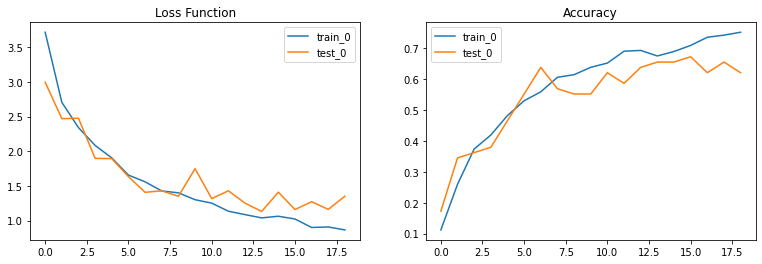

In [ ]:
plt.figure(figsize=(13, 4))

#loss function
plt.subplot(1,2,1)
plt.plot(history_0.history['loss'], label='train_0')
plt.plot(history_0.history['val_loss'], label='test_0')
plt.title('Loss Function')
plt.legend()

#accuracy
plt.subplot(1,2,2)
plt.plot(history_0.history['accuracy'], label='train_0')
plt.plot(history_0.history['val_accuracy'], label='test_0')
plt.title('Accuracy')
plt.legend()
plt.show()


**########  model_vgg16_1  ####################**

In [ ]:
x_1 = keras.applications.vgg16.VGG16(include_top=True, weights="imagenet",input_shape= (224,224,3))
x = x_1.layers[-2].output
predictions = Dense(29, activation='softmax')(x)
model_vgg16_1 = tf.keras.Model(inputs=x_1.input, outputs=predictions)

for layer in model_vgg16_1.layers:
  layer.trainable = False
model_vgg16_1.layers[-1].trainable = True
model_vgg16_1.layers[-2].trainable = True
model_vgg16_1.layers[-3].trainable = True
model_vgg16_1.layers[-4].trainable = True
model_vgg16_1.layers[-5].trainable = True

#print(model_vgg16_1.summary())
model_vgg16_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_1 = model_vgg16_1.fit(train_tot, validation_data = validation_tot, epochs = 30,callbacks = [early_stopping])

Epoch 1/30
74/74 [==============================] - 24s 317ms/step - loss: 4.6713 - accuracy: 0.1288 - val_loss: 1.8835 - val_accuracy: 0.3966
Epoch 2/30
74/74 [==============================] - 23s 304ms/step - loss: 1.2807 - accuracy: 0.5939 - val_loss: 1.0366 - val_accuracy: 0.7069
Epoch 3/30
74/74 [==============================] - 23s 306ms/step - loss: 0.6713 - accuracy: 0.7867 - val_loss: 0.7291 - val_accuracy: 0.7759
Epoch 4/30
74/74 [==============================] - 24s 319ms/step - loss: 0.4596 - accuracy: 0.8660 - val_loss: 0.6769 - val_accuracy: 0.8103
Epoch 5/30
74/74 [==============================] - 23s 305ms/step - loss: 0.3561 - accuracy: 0.8993 - val_loss: 0.5520 - val_accuracy: 0.8793
Epoch 6/30
74/74 [==============================] - 23s 305ms/step - loss: 0.2654 - accuracy: 0.9215 - val_loss: 0.5106 - val_accuracy: 0.8448
Epoch 7/30
74/74 [==============================] - 23s 303ms/step - loss: 0.3103 - accuracy: 0.9061 - val_loss: 0.4601 - val_accuracy: 0.8448

In [ ]:
results_1 = model_vgg16_1.evaluate(test_tot, batch_size=10)
print("Results_1 test loss, test acc:", results_1)

9/9 [==============================] - 1s 132ms/step - loss: 0.9280 - accuracy: 0.7737
Results_1 test loss, test acc: [0.9280053377151489, 0.7737226486206055]


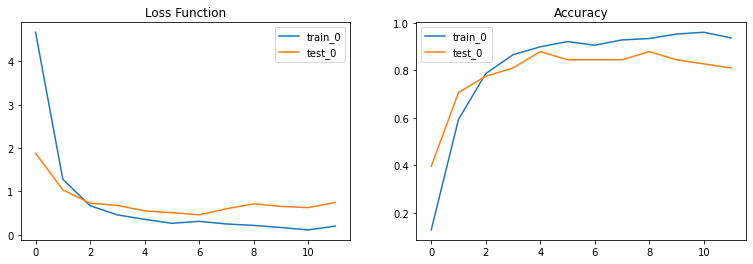

In [ ]:
plt.figure(figsize=(13, 4))

#loss function
plt.subplot(1,2,1)
plt.plot(history_1.history['loss'], label='train_0')
plt.plot(history_1.history['val_loss'], label='test_0')
plt.title('Loss Function')
plt.legend()

#accuracy
plt.subplot(1,2,2)
plt.plot(history_1.history['accuracy'], label='train_0')
plt.plot(history_1.history['val_accuracy'], label='test_0')
plt.title('Accuracy')
plt.legend()
plt.show()


**########  model_vgg16_2  ####################**

In [ ]:
x_1 = keras.applications.vgg16.VGG16(include_top=False, weights="imagenet",input_shape= (224,224,3))
x = x_1.layers[-1].output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(29, activation='softmax')(x)
model_vgg16_2 = tf.keras.Model(inputs=x_1.input, outputs=predictions)

for layer in model_vgg16_2.layers:
  layer.trainable = False
model_vgg16_2.layers[-1].trainable = True
model_vgg16_2.layers[-2].trainable = True
model_vgg16_2.layers[-3].trainable = True
model_vgg16_2.layers[-4].trainable = True
model_vgg16_2.layers[-5].trainable = True
#print(model_vgg16_2.summary())
model_vgg16_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
history_2 = model_vgg16_2.fit(train_tot, validation_data = validation_tot, epochs = 30,callbacks = [early_stopping])

Epoch 1/30
55/74 [=====================>........] - ETA: 6s - loss: 5.3386 - accuracy: 0.0864

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


74/74 [==============================] - 33s 440ms/step - loss: 4.7424 - accuracy: 0.1015 - val_loss: 2.3383 - val_accuracy: 0.4310
Epoch 2/30
74/74 [==============================] - 24s 318ms/step - loss: 2.6034 - accuracy: 0.2184 - val_loss: 1.6612 - val_accuracy: 0.5172
Epoch 3/30
74/74 [==============================] - 23s 316ms/step - loss: 2.2308 - accuracy: 0.3336 - val_loss: 1.4241 - val_accuracy: 0.5862
Epoch 4/30
74/74 [==============================] - 23s 314ms/step - loss: 2.0024 - accuracy: 0.3712 - val_loss: 1.2951 - val_accuracy: 0.6897
Epoch 5/30
74/74 [==============================] - 23s 313ms/step - loss: 1.9579 - accuracy: 0.4104 - val_loss: 1.1218 - val_accuracy: 0.6724
Epoch 6/30
74/74 [==============================] - 22s 301ms/step - loss: 1.8761 - accuracy: 0.4224 - val_loss: 1.0370 - val_accuracy: 0.6897
Epoch 7/30
74/74 [==============================] - 22s 300ms/step - loss: 1.8125 - accuracy: 0.4599 - val_loss: 1.1785 - val_accuracy: 0.7069
Epoch 8/30

In [ ]:
results_2 = model_vgg16_2.evaluate(test_tot, batch_size=10)
print("Results_2 test loss, test acc:", results_2)

9/9 [==============================] - 1s 125ms/step - loss: 0.9857 - accuracy: 0.7591
Results_2 test loss, test acc: [0.9857163429260254, 0.7591241002082825]


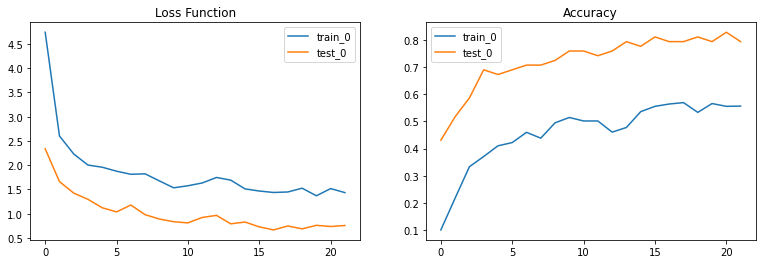

In [ ]:
plt.figure(figsize=(13, 4))

#loss function
plt.subplot(1,2,1)
plt.plot(history_2.history['loss'], label='train_0')
plt.plot(history_2.history['val_loss'], label='test_0')
plt.title('Loss Function')
plt.legend()

#accuracy
plt.subplot(1,2,2)
plt.plot(history_2.history['accuracy'], label='train_0')
plt.plot(history_2.history['val_accuracy'], label='test_0')
plt.title('Accuracy')
plt.legend()
plt.show()


**########  model_vgg16_3  ####################**

In [ ]:
x_1 = keras.applications.vgg16.VGG16(include_top=False, weights="imagenet",input_shape= (448,448,3))
x = x_1.layers[-1].output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(29, activation='softmax')(x)
model_vgg16_3 = tf.keras.Model(inputs=x_1.input, outputs=predictions)

for layer in model_vgg16_3.layers:
  layer.trainable = False
model_vgg16_3.layers[-1].trainable = True
model_vgg16_3.layers[-2].trainable = True
model_vgg16_3.layers[-3].trainable = True
model_vgg16_3.layers[-4].trainable = True
model_vgg16_3.layers[-5].trainable = True
#print(model_vgg16_3.summary())
model_vgg16_3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_3 = model_vgg16_3.fit(train_tot_448, validation_data = validation_tot_448, epochs = 30,callbacks = [early_stopping])

Epoch 1/30
 8/74 [==>...........................] - ETA: 48s - loss: 29.6071 - accuracy: 0.0345

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


74/74 [==============================] - 66s 881ms/step - loss: 11.1309 - accuracy: 0.0435 - val_loss: 3.2993 - val_accuracy: 0.0517
Epoch 2/30
74/74 [==============================] - 60s 802ms/step - loss: 3.3574 - accuracy: 0.0589 - val_loss: 3.2219 - val_accuracy: 0.1207
Epoch 3/30
74/74 [==============================] - 63s 850ms/step - loss: 3.2642 - accuracy: 0.0640 - val_loss: 3.0867 - val_accuracy: 0.1207
Epoch 4/30
74/74 [==============================] - 63s 856ms/step - loss: 3.2761 - accuracy: 0.0759 - val_loss: 3.0265 - val_accuracy: 0.1034
Epoch 5/30
74/74 [==============================] - 64s 858ms/step - loss: 3.2609 - accuracy: 0.0922 - val_loss: 3.1372 - val_accuracy: 0.1379
Epoch 6/30
74/74 [==============================] - 64s 856ms/step - loss: 3.3280 - accuracy: 0.0700 - val_loss: 3.5062 - val_accuracy: 0.0345
Epoch 7/30
74/74 [==============================] - 60s 807ms/step - loss: 3.3337 - accuracy: 0.0580 - val_loss: 3.2873 - val_accuracy: 0.0517
Epoch 8/3

In [ ]:
results_3 = model_vgg16_3.evaluate(test_tot_448, batch_size=10)
print("Results_3 test loss, test acc:", results_3)

9/9 [==============================] - 6s 685ms/step - loss: 3.2034 - accuracy: 0.1095
Results_3 test loss, test acc: [3.203418254852295, 0.10948905348777771]


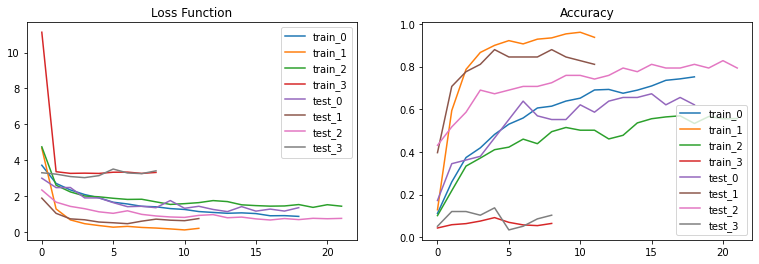

In [ ]:
plt.figure(figsize=(13, 4))

#loss function
plt.subplot(1,2,1)
plt.plot(history_0.history['loss'], label='train_0')
plt.plot(history_1.history['loss'], label='train_1')
plt.plot(history_2.history['loss'], label='train_2')
plt.plot(history_3.history['loss'], label='train_3')
plt.plot(history_0.history['val_loss'], label='test_0')
plt.plot(history_1.history['val_loss'], label='test_1')
plt.plot(history_2.history['val_loss'], label='test_2')
plt.plot(history_3.history['val_loss'], label='test_3')
plt.title('Loss Function')
plt.legend()

#accuracy
plt.subplot(1,2,2)
plt.plot(history_0.history['accuracy'], label='train_0')
plt.plot(history_1.history['accuracy'], label='train_1')
plt.plot(history_2.history['accuracy'], label='train_2')
plt.plot(history_3.history['accuracy'], label='train_3')
plt.plot(history_0.history['val_accuracy'], label='test_0')
plt.plot(history_1.history['val_accuracy'], label='test_1')
plt.plot(history_2.history['val_accuracy'], label='test_2')
plt.plot(history_3.history['val_accuracy'], label='test_3')
plt.title('Accuracy')
plt.legend()
plt.show()
